In [1]:
from Bayesian_Neural_Network import bayesian_neural_network

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

np.random.seed(10120024)

# Data Preparation

In [2]:
feature_data, target_data = make_classification(
                            n_samples=200, 
                            n_features=2, 
                            n_redundant=0, 
                            n_clusters_per_class=1, 
                            weights=[0.5], 
                            flip_y=0, 
                            random_state=10120024
                            )

target_data[target_data == 0] = -1

In [3]:
feature_data_train, feature_data_test, target_data_train, target_data_test = train_test_split(
                                                                                                feature_data, 
                                                                                                target_data, 
                                                                                                test_size=0.1, 
                                                                                                random_state=10120024
                                                                                                )

In [4]:
data = pd.DataFrame({
    'Fitur Data 1':feature_data[:, 0],
    'Fitur Data 2':feature_data[:, 1],
    'Keluaran Aktual - Angka':target_data
})

data['Keluaran Aktual'] = data['Keluaran Aktual - Angka'].apply(lambda row: 'Kelas A' if row == 1 else 'Kelas B')

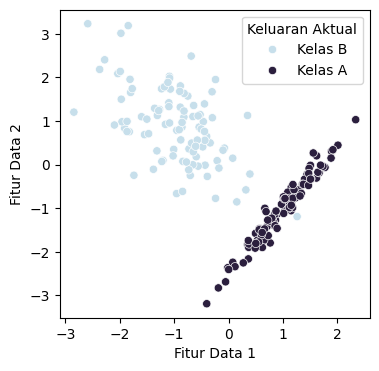

In [5]:
fig = plt.figure()
fig.set_size_inches(4, 4)
sns.scatterplot(data=data, x='Fitur Data 1', y='Fitur Data 2', hue='Keluaran Aktual', palette="ch:s=.25,rot=-.25")
plt.savefig('data_sintesis_vis.png')

# Model Developments

In [6]:
input_layer = [2]
hidden_layers = [4, 4]
output_layer = [1]

total_epochs = 100
initial_lr = 1e-2
lr_decay_rate = 0.98
batch_size = 25

In [7]:
np.random.seed(10120024)

bnn = bayesian_neural_network(input_layer, 
                                hidden_layers, 
                                output_layer, 
                                feature_data_train, 
                                target_data_train, 
                                batch_size=batch_size,
                                initial_lr=initial_lr, 
                                lr_decay_rate=lr_decay_rate,
                                total_epochs=total_epochs)

In [8]:
bnn.train_model()

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 100 - Learning Rate : 0.0098 - Succesfull Train Percentage : 100.0% - Time Passed : 0.19 Second
Accuracy : 50.55555555555556% - Precision : 50.55555555555556% - Sensitivity : 100.0% - Standard Deviation : 0.7770314649306752
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 100 - Learning Rate : 0.009604 - Succesfull Train Percentage : 100.0% - Time Passed : 0.18 Second
Accuracy : 50.55555555555556% - Precision : 50.55555555555556% - Sensitivity : 100.0% - Standard Deviation : 0.7791021192514456
-------------------------------------------------------------------------

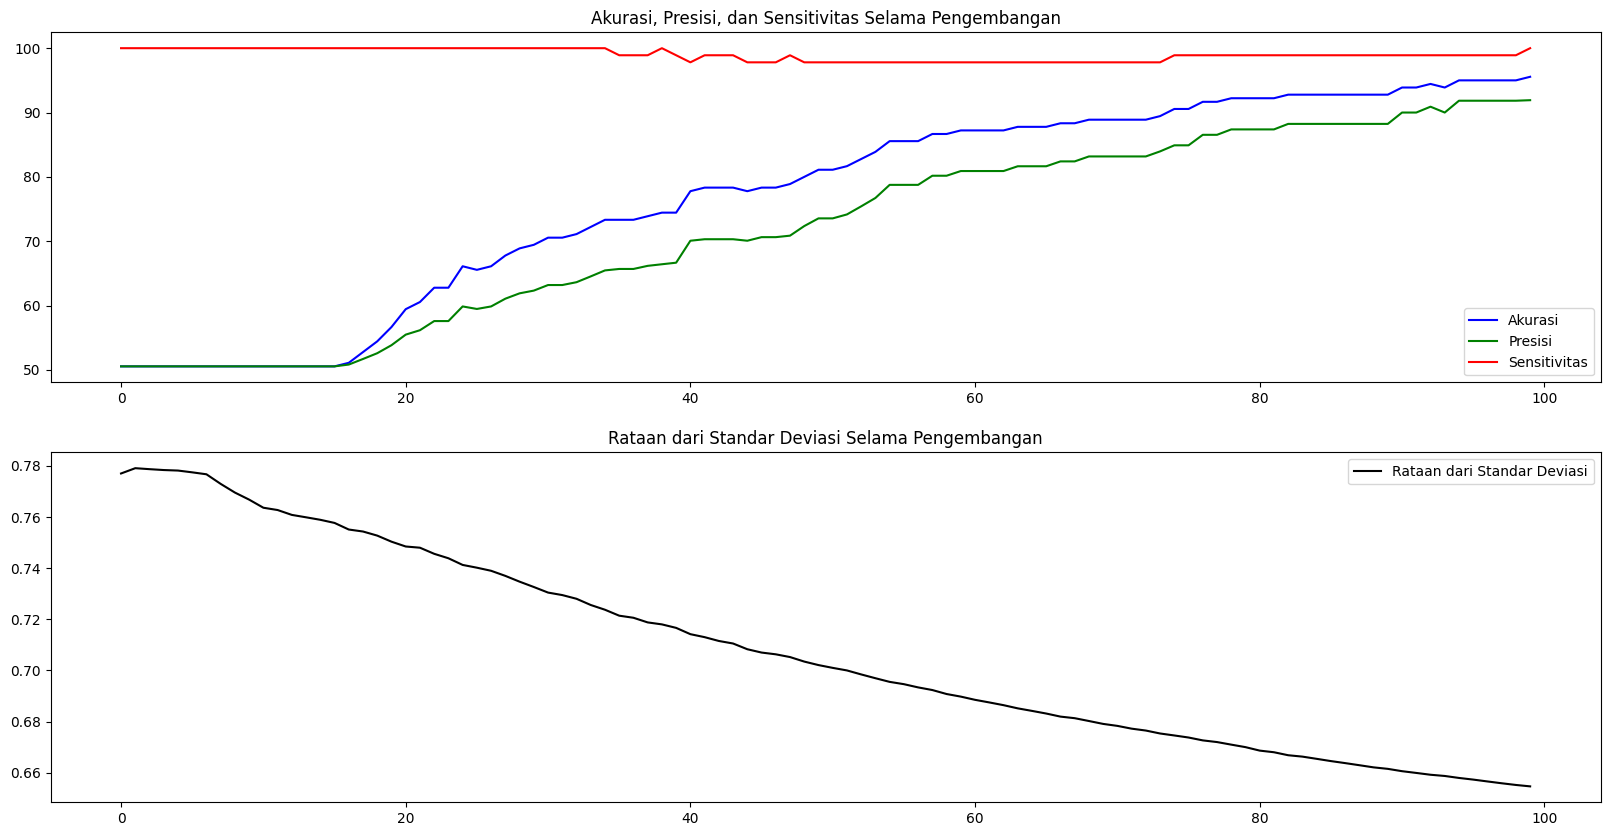

In [9]:
bnn.visualize_model_performance(save_file_name='performa_data_sintesis_vis')

# Evaluate Model Performance

In [10]:
on_seen_data_result, on_seen_data_eval = bnn.predict_and_evaluate(feature_data_train, target_data_train)
on_unseen_data_result, on_unseen_data_eval = bnn.predict_and_evaluate(feature_data_test, target_data_test)

In [11]:
on_seen_data_eval

,Evaluation Metric,Value
0,Accuracy,95.555556
1,Precision,91.919192
2,Sensitivity,100.000000
3,Mean Standard Deviation,0.654266


In [12]:
on_unseen_data_eval

,Evaluation Metric,Value
0,Accuracy,90.000000
1,Precision,81.818182
2,Sensitivity,100.000000
3,Mean Standard Deviation,0.690485


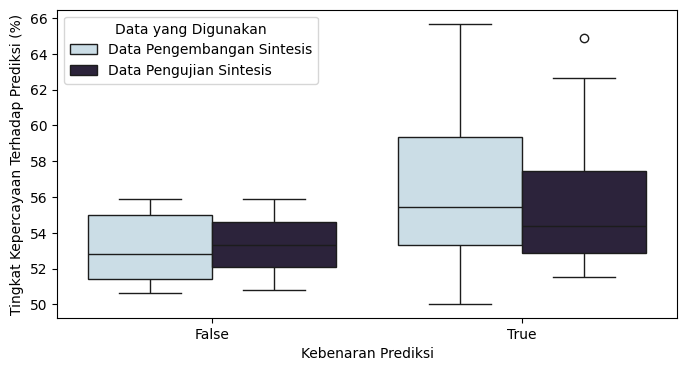

In [13]:
on_seen_data_result['Data yang Digunakan'] = 'Data Pengembangan Sintesis'
on_unseen_data_result['Data yang Digunakan'] = 'Data Pengujian Sintesis'

fig = plt.figure()
fig.set_size_inches(8, 4)
sns.boxplot(data=pd.concat((on_seen_data_result, on_unseen_data_result)), x='Kebenaran Prediksi', y='Tingkat Kepercayaan Terhadap Prediksi (%)', hue='Data yang Digunakan', palette="ch:s=.25,rot=-.25")
fig.savefig('kepercayaan_data_sintesis_vis.png')